# Making Business Decisions Based on Data

**Project Description**

For our online store, working together with the marketing departement, we've compiled a list of hypotheses that may help boost our revenue. In this project we will prioritize these hypotheses, launch an A/B test, and analyze the results.

<a id="top"></a>
# Content

* **[Data Preprocessing](#1)**
    * [The Hypotheses Table](#1.1)
    * [The Orders Table](#1.2)
    * [The Visits Table](#1.3)
<br>
<br>
* **[Part 1 - Prioritizing Hypotheses](#2)**
    * [ICE](#2.3)
    * [RICE](#2.2)
    * [Differences between ICE and RICE](#2.3)
<br>
<br>
* **[Part 2 - A/B Test Analysis](#3)**
    * [Cumulative Revenue](#3.1)
    * [Cumulative Average Order Size](#3.2)
    * [Relative Difference in Average Order Size](#3.3)
    * [Conversion Rates](#3.4)
    * [Orders per User](#3.5)
    * [Anomalies in Number of Orders](#3.6)
    * [Order Prices](#3.7)
    * [Anomalies in Prices](#3.8)
    * [Statistical Significance in Conversion](#3.9)
    * [Statistical Significance in Average Order Size](#3.10)
    * [Recommendation based on the Test Results](#3.11)

<a id="1"></a>
## Data Preprocessing

First we will import the libraries that we will need in this project and define some colors for our graphs. 
Then we need to import our datasets, look at what we have and check for mistakes that we might need to correct. For the first check we will define a function that we can use for all three tables.

* [The Hypotheses Table](#1.1)
* [The Orders Table](#1.2)
* [The Visits Table](#1.3)

---
[back to content](#top)

In [1]:
# importing the necessary libraries
import pandas as pd
pd.set_option('max_colwidth', 400)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# defining a color scheme for visualizations
neutral = '#CED2CC' # light grey
header = '#23282D' # anthrazit
data1 = '#6AB187' # pastel green
data2 = '#1F3F49' # forest green  
data3 = '#4CB5F5' # light blue
accent1 = '#D32D41' #pinkish red
accent2 = '#B3C100' # yellow

In [2]:
# the function for general information about the table
def data_check(df, n_samples):
    # checking for basic information about numbers of entries and datatypes
    print('\033[1m' + 'Information:' + '\033[0m')
    print()
    display(df.info())

    # printing random rows to see the dataframe
    print('\033[1m' + 'Sample Rows:' + '\033[0m')
    display(df.sample(n_samples))

    # checking the numerical values in detail
    print('\033[1m' + 'Numerical Values:' + '\033[0m')
    display(df.describe())
    
    # checking for duplicates
    print('\033[1m' + 'Duplicates:' + '\033[0m', df.duplicated().sum())
    
    # checking the first and last date
    try:
        print()
        print('\033[1m' + 'First date:' + '\033[0m', df['date'].min())
        print('\033[1m' + 'Last Date:' + '\033[0m', df['date'].max())
    except:
        pass

<a id="1.1"></a>
### The Hypotheses Table

The table contains the following columns:
* `Hypotheses` — brief descriptions of the hypotheses
* `Reach` — user reach, on a scale of one to ten
* `Impact` — impact on users, on a scale of one to ten
* `Confidence` — confidence in the hypothesis, on a scale of one to ten
* `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

In [3]:
# importing the dataset

hypotheses = pd.read_csv('D:\laura\Documents\Practicum100\Datasets\hypotheses_us.csv', sep=';')

# changing the column names to lowerstring
hypotheses = hypotheses.rename(columns = str.lower)

data_check(hypotheses, 9)

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Sample Rows:


,hypothesis,reach,impact,confidence,effort
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
5,Add a customer review page. This will increase the number of orders,3,2,2,3
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6


Numerical Values:


,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Duplicates: 0



**Conclusion**

We have 9 hypotheses in our table. Each one has estimated values for the **reach** and **impact** they will have, the **confidence** that they will be succseffull and the **effort** that it will take to implement the necessary changes, based on a scale from 0-10.

We don't have any missing values or errors, so we can continue with our analysis.

[back to data preprocessing](#1) - [back to content](#top)

<a id="1.2"></a>
### The Orders Table

The table contains the following columns:
* `transactionId` — order identifier
* `visitorId` — identifier of the user who placed the order
* `date` — of the order
* `revenue` — from the order
* `group` — the A/B test group that the user belongs to

In [4]:
# importing the dataset
orders = pd.read_csv('D:\laura\Documents\Practicum100\Datasets\orders_us.csv', parse_dates=['date'])
    
data_check(orders, 5)

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

Sample Rows:


,transactionId,visitorId,date,revenue,group
626,3022667018,3935952912,2019-08-29,30.1,B
851,986374747,949750571,2019-08-27,10.1,A
406,1441855393,1404934699,2019-08-03,420.1,B
521,641338041,623318263,2019-08-26,165.6,B
125,2232016803,428219747,2019-08-17,125.9,B


Numerical Values:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


Duplicates: 0

First date: 2019-08-01 00:00:00
Last Date: 2019-08-31 00:00:00


In [5]:
# finding users that have been assigned to multiple groups and filtereing them out of the orders table
multi_groups = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'}).query('group > 1')['visitorId']
orders_clean = orders[~orders['visitorId'].isin(multi_groups)]
len(orders) - len(orders_clean)

181

**Conclusion**

We have the information for 1197 transactions that took place between August 1st 2019 and August 31st 2019. Our table holds the unique `transaction_id`, the `visitorId`, the `date` of the transaction, the `revenue` and the `group` that the visitor is in (A or B). We already parsed the date while importing the dataset so we don't need to change any more datatypes. There are also no missing values or duplicates.

The lowest revenue that a transaction had was **\$ 5.00** while the highest was **\$ 19,920.40** and the mean was **\$ 131.49**.

we found **181** users that were falsley assigned to more than one group and deleted their entries from the orders table. This might affect our calculations on conversion rates, since we only have aggregated data for the visits, but including those user would skew our analysis because we don't know what they actually saw and what influenced their behavior.

[back to data preprocessing](#1) - [back to content](#top)

<a id="1.3"></a>
### The Visits Table

The table contains the following columns:
* `date` — date
* `group` — A/B test group
* `visits` — the number of visits on the date specified in the A/B test group specified

In [6]:
# importing the dataset
visits = pd.read_csv("D:\laura\Documents\Practicum100\Datasets\log_visits_us.csv",
                     parse_dates=['date'],
                     dtype={'visits':'int'})


# checking basic information about the table
data_check(visits, 5)

Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 1.3+ KB


None

Sample Rows:


,date,group,visits
19,2019-08-20,A,575
60,2019-08-30,B,490
28,2019-08-29,A,577
22,2019-08-23,A,468
18,2019-08-19,A,502


Numerical Values:


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Duplicates: 0

First date: 2019-08-01 00:00:00
Last Date: 2019-08-31 00:00:00


In [7]:
# changing the datatype of visits to integer
visits['visits'] = visits['visits'].astype('int')

**Conclusion**

We have 62 entries in our table (32 for each group) that hold the `date`, `group` and `visits` for that day. There are no missing values or duplicated entries so we don't need to change anything. We already parsed the `date` column as date and the `visits` as integer while importing the dataset.

Each day had between **361** and **770** visits, while the mean number of visits is **607**. The first date is August 1st 2019 and the last date is August 31st 2019, which matches our data from the `orders` table.

[back to data preprocessing](#1) - [back to content](#top)

<a id="2"></a>
## Part 1 - Prioritizing Hypotheses

The `hypotheses` table contains nine hypotheses on boosting our online store's revenue with Reach, Impact, Confidence, and Effort specified for each. We will apply the **ICE** and **RICE** frameworks and compare their prioritization.

* [ICE](#2.1)
* [RICE](#2.2)
* [Differences ICE and RICE](#2.3)


---
[back to content](#top)


<a id="2.1"></a>
### The ICE framework

We will apply the ICE framework to prioritize hypotheses and sort them in descending order of priority.

In [8]:
# calculating ICE in a new column
hypotheses['ICE'] = hypotheses['impact'] * hypotheses['confidence'] / hypotheses ['effort']
hypotheses[['hypothesis', 'ICE']].sort_values('ICE', ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


**Conclusion**

According to the ICE framework hypothesis 8, 0 and 7 have the highest priorities while hypotheses 3, 4 and 5 should be neglected.

[back to prioritizing hypotheses](#2) - [back to content](#top)

<a id="2.2"></a>
### The RICE framework
Now we will apply the RICE framework to prioritize hypotheses and sort them in descending order of priority.

In [9]:
# calculating RICE in a new column
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
hypotheses[['hypothesis', 'RICE']].sort_values('RICE', ascending=False)

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


**Conclusion**

According to the RICE framework hypotheses 7, 2 and 0 should pe prioritized while hypotheses 1, 4 and 5 have the lowest score.

[back to prioritizing hypotheses](#2) - [back to content](#top)

<a id="2.3"></a>
### Differences between ICE and RICE
Let's compare the prioritization of hypotheses changes when we use RICE instead of ICE. Since they have different scales we will divide RICE by 10.

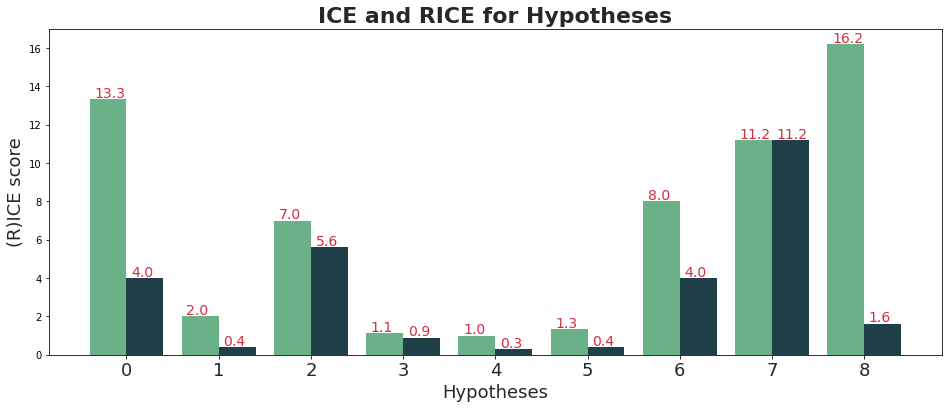

In [10]:
# dividing RICE by 10 to have the same scale as ICE
hypotheses['RICE'] = hypotheses['RICE'] / 10

# setting up a bar plot for ICE and RICE
plt.figure(figsize=(16,6))
plt.title('ICE and RICE for Hypotheses', color=header, fontweight='bold', fontsize=22)
plt.xlabel('Hypotheses', color=header, fontsize=18)
plt.ylabel('(R)ICE score', color=header, fontsize=18)
plt.xticks(hypotheses.index, fontsize=18, color=header)
plt.bar(hypotheses.index-.2, hypotheses['ICE'], width=0.4, color=data1)    
plt.bar(hypotheses.index+0.2, hypotheses['RICE'], width=0.4, color=data2)

# adding the values to the bars
for i, v in enumerate(hypotheses.ICE):
    plt.text(i-0.35, v+0.1, str(round(v, 1)), color=accent1, fontsize=14)
for i, v in enumerate(hypotheses.RICE):
    plt.text(i+0.05, v+0.1, str(round(v, 1)), color=accent1, fontsize=14)
    
# showing the plot
plt.show()

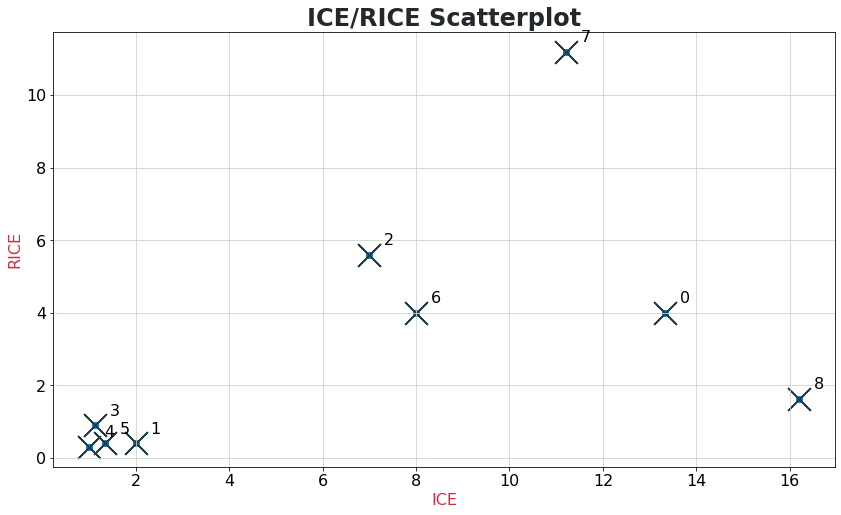

In [11]:
# adding a scatterplot to see which hypothesis was weighted the highest in both frameworks
# new data frame with split value columns
new = hypotheses["hypothesis"].str.split(None, n = 1, expand = True)
  
# making separate first name column from new data frame
hypotheses["hypothesis_start"]= new[0]+new[1]

x = hypotheses['ICE'].values
y = hypotheses['RICE'].values
types = hypotheses.index

# setting up the figure
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x, y)
ax.set_xlabel('ICE', fontsize=16, color=accent1)
ax.set_ylabel('RICE', fontsize=16, color=accent1)
ax.set_title('ICE/RICE Scatterplot', fontsize=24, fontweight='bold', color=header)
ax.grid(color=neutral)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

# adding the number of the hypothesis
for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(15,10), textcoords='offset points', fontsize=16)
    plt.scatter(x, y, marker='x', s=500, color=data2)
    
plt.show()

**Conclusion**

When using the **RICE** framework and therefore adding the reach into our calculations we can see that the priority for most of the hypotheses changes. For example hypotheses 0 (*Add two new channels for attracting traffic. This will bring 30% more users*) had an ICE score of **13.3**, but when we take the assumed reach into account, which is weighted with only 3 out of 10, the score decreases to **4.0**.

Likewise hypotheses 8 (*Launch a promotion that gives users discounts on their birthdays*) has a ICE score of **16.2** but when taking the reach of only 1 into account the RICE score is only **1.6**.

None of the hypotheses priority score increased when taking the reach into account, but for example hypothesis 7 (*Add a subscription form to all the main pages. This will help you compile a mailing list*) has an estimated maximum reach of 10, the score doesn't change when taking it into account and is still **11.2**. Still it is one of the highest prioritized hypotheses in both frameworks, so it would be a good candidate for an A/B test.

[back to prioritizing hypotheses](#2) - [back to content](#top)

<a id="3"></a>
## Part 2 - A/B Test Analysis

We carried out an A/B test and got the results described in the tables `orders` and `visits`. In the next steps we will analyze the results of our test in detail.

* [Cumulative Revenue](#3.1)
* [Cumulative Average Order Size](#3.2)
* [Relative Difference in Average Order Size](#3.3)
* [Conversion Rates](#3.4)
* [Orders per User](#3.5)
* [Anomalies in Number of Orders](#3.6)
* [Order Prices](#3.7)
* [Anomalies in Prices](#3.8)
* [Statistical Significance in Conversion](#3.9)
* [Statistical Significance in Average Order Size](#3.10)
* [Decision Based on the Test Results](#3.11)
<br>

---
[back to content](#top)

<a id="3.1"></a>
### Cumulative Revenue

First let's find the cumulative total revenue for each group and compare them.

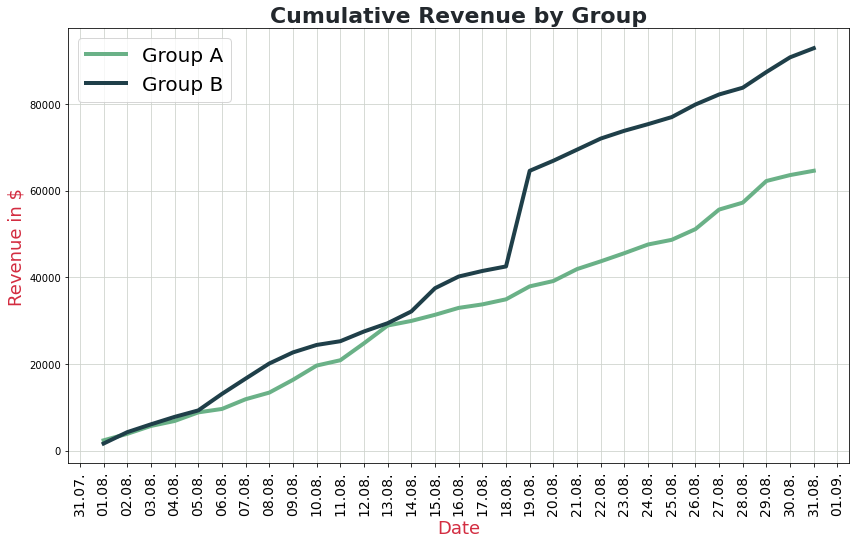

In [12]:
# defining the dates for each group
datesGroups = orders[['date', 'group']].drop_duplicates()

# aggregating orders and finding the cumulative transactions, buyers and revenue
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                           orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique',
                                 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

# aggregating visits and finding the cumulative number of visitors for each group
visitorsAggregated = (datesGroups
                     .apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                                             visits['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1)
                     .sort_values(by=['date', 'group']))

# merging the aggregated tables
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date','group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# filtering the cumulative data by group
cumulativeRevenueA = cumulativeData.query('group == "A"')[['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData.query('group == "B"')[['date','revenue', 'orders']]

# setting up a linegraph for cumulative revenue by group
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
plt.title('Cumulative Revenue by Group', color=header, fontsize=22, fontweight='bold')
plt.ylabel('Revenue in $', color=accent1, fontsize=18)
plt.xlabel('Date', color=accent1, fontsize=18)
plt.xticks(cumulativeRevenueA['date'], rotation=90, fontsize=14)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.'))
plt.grid(color=neutral)

# plotting the line for Group A
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'],
         label = 'Group A',
         color=data1,
         linewidth=4)

# plotting the line fro Group B
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'],
         label = 'Group B',
         color=data2,
         linewidth=4)

plt.legend(fontsize=20)
plt.show()

**Conclusion**

Both groups started of with very similar revenues in the first 4 days of the test. After that the cumulative revenue from Group B was slightly higher than that of Group A for the next week. On August 13th the cumulative revenue from both groups was the same. But from there on Group Bs cumulative revenue was steadily higher than that of Group A.

There was a big jump in revenue for Group B on August 19th which seems to be mostly responsible for the distance between both revenues after that date.

[back to A/B test](#3) - [back to content](#top)

<a id="3.2"></a>
### Cumulative Average Order Size

We also want to know the average order size. We will also use the cumulative average revenue per order and compare the results for Group A and B over time.

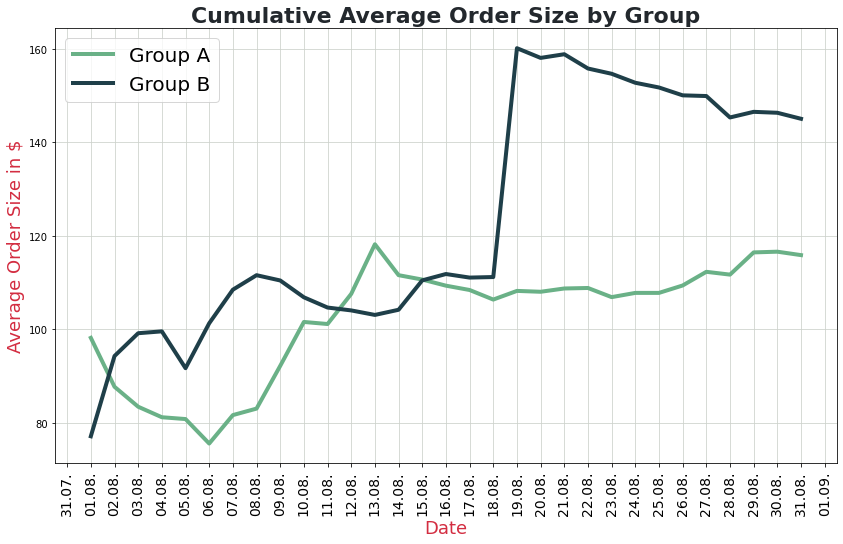

In [13]:
# setting up the linegraph for average order size
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
plt.title('Cumulative Average Order Size by Group',
          color=header,
          fontsize=22,
          fontweight='bold')

plt.ylabel('Average Order Size in $', color=accent1, fontsize=18)
plt.xlabel('Date', color=accent1, fontsize=18)
plt.xticks(rotation=90, fontsize=14)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.'))
plt.grid(color=neutral)

# the line for Group A (dividing revenue by number of orders)
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
         label='Group A',
         color=data1,
         linewidth=4)

# the line for Group A (dividing revenue by number of orders)
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
         label='Group B',
         color=data2,
         linewidth=4)

plt.legend(loc='upper left', fontsize=20)
plt.show()

**Conclusion**

During the first week or so of our test the cumulative average revenue from Group B was higher than that of Group A, but this changed briefly from August 12th to August 15th. As we already noticed before when we looked at the total revenue we can see a peak in the average revenue from Group B on August 19th where it jumped from **\$ 110** to **\$ 160** in a day.

After this the cumulative average revenue from Group B stayed higher than that of Group A but it increased with each day. There is a possibility that if we continue our test the average revenues will align again or at least get closer to each other.

[back to A/B test](#3) - [back to content](#top)

<a id="3.3"></a>
### Relative Difference in Average Order Size

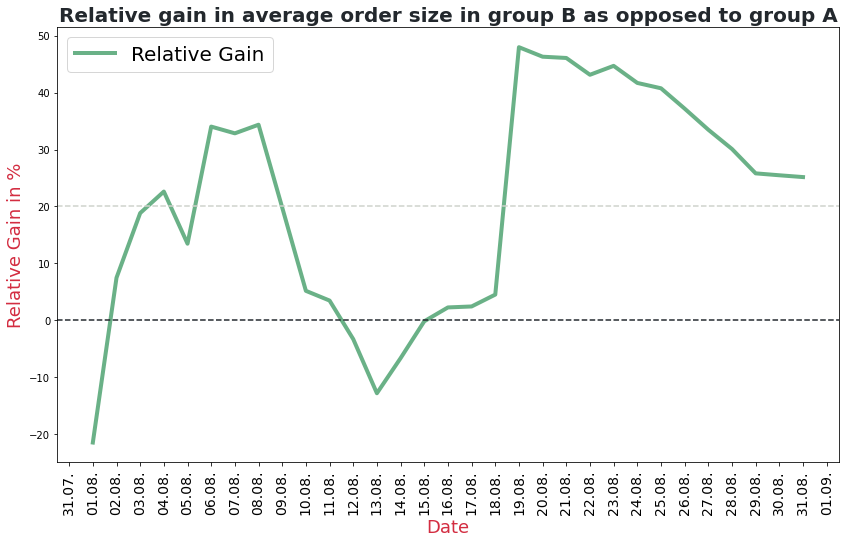

In [14]:
# calculating the cumulative average order size for each date and group
cumulativeData['avg_order_size'] = cumulativeData['revenue']/cumulativeData['orders']

# dividing the data by group
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# merging the dataframes for each group into one
mergedCumulativeOrdersize = cumulativeDataA[['date','avg_order_size']].merge(cumulativeDataB[['date','avg_order_size']],
                                                                           on='date',
                                                                           how='left',
                                                                           suffixes=['A', 'B'])

# setting up a linegraph for relative gain in order size
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
plt.title('Relative gain in average order size in group B as opposed to group A', color=header, fontsize=20, fontweight='bold')
plt.xlabel('Date', color=accent1, fontsize=18)
plt.ylabel('Relative Gain in %', color=accent1, fontsize=18)
plt.xticks(rotation=90, fontsize=14)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.'))

# plotting the line
plt.plot(mergedCumulativeOrdersize['date'],
        (mergedCumulativeOrdersize['avg_order_sizeB']/mergedCumulativeOrdersize['avg_order_sizeA']-1)*100,
         color=data1,
         linewidth=4,
         label="Relative Gain")

# adding lines for 0% and 20%
plt.axhline(y=0, color=header, linestyle='--')
plt.axhline(y=20, color=neutral, linestyle='--')

plt.legend(loc='upper left', fontsize=20)
plt.show()

**Conclusion**

In the first days of our test the distance between the average order size of Group B as opposed to Group A rose up to a relative gain of **35%** but decreased to a negative value between August 10th and August 15th, meaning that the cumulative average order size was less than that of Group A. 

Again we can see that the spike on August 19th had a huge impact on our data. The relative gain increased to almost **50%** on that day but decreased after that. On August 31st the relative gain in average order size was around **25%** for Group B as opposed to Group A.


[back to A/B test](#3) - [back to content](#top)

<a id="3.4"></a>
### Conversion Rates
We will calculate each group's conversion rate as the ratio of orders to the number of visits for each day and then plot the daily conversion rates of the two groups.

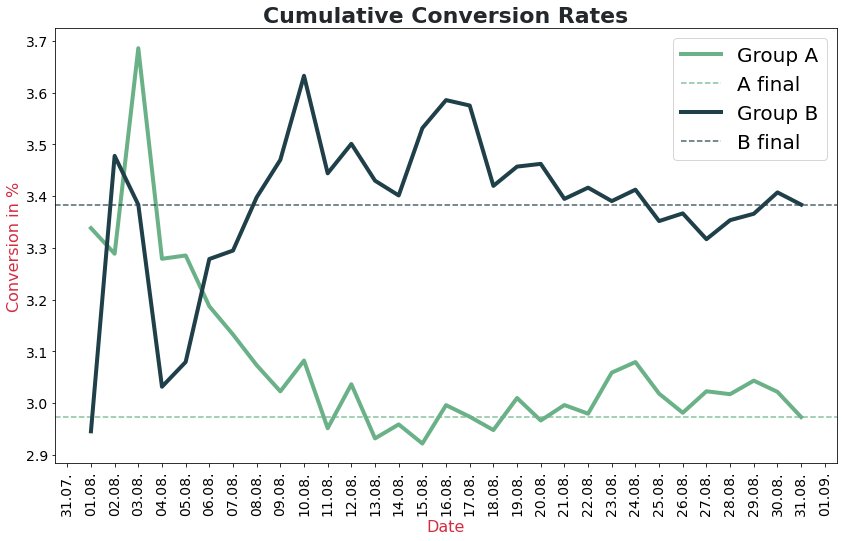

In [15]:
# calculating the conversion rates
cumulativeDataA['conversion_rate'] = cumulativeDataA['orders'] / cumulativeDataA['visitors'] * 100
cumulativeDataB['conversion_rate'] = cumulativeDataB['orders'] / cumulativeDataB['visitors'] * 100

# setting the date as index
cumulativeConversionA = cumulativeDataA[['date', 'conversion_rate']].set_index('date')
cumulativeConversionB = cumulativeDataB[['date', 'conversion_rate']].set_index('date')

# setting up a linegraph for cumulative conversion rates
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
plt.title('Cumulative Conversion Rates', color=header, fontsize=22, fontweight='bold')
plt.yticks(fontsize=14)
plt.xticks(cumulativeConversionA.index, rotation=90, fontsize=14)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.'))
plt.ylabel('Conversion in %', color=accent1, fontsize=16)
plt.xlabel('Date', color=accent1, fontsize=16)

# the lines for Group A cumulative conversion rate and final conversion rate
plt.plot(cumulativeConversionA['conversion_rate'], label="Group A", color=data1, linewidth=4)
plt.axhline(cumulativeConversionA['conversion_rate'][30], color = data1, linestyle='--', alpha=0.8, label='A final')

# the lines for Group B cumulative conversion rate and final conversion rate
plt.plot(cumulativeConversionB['conversion_rate'], label="Group B", color=data2, linewidth=4)
plt.axhline(cumulativeConversionB['conversion_rate'][30], color = data2, linestyle='--', alpha=0.8, label='B final')

# showing the plot and legend
plt.legend(fontsize=20)
plt.show()

**Conclusion**

We can't gather useful insights from the first days of our test. The conversion rates for both groups vary highly. But from August 6th on the conversion rate in Group B rose above that of Group A and stayed higher until August 31st. Group B had stronger variations but settled at a conversion rate of almost **3.4%** while the conversion rate of Group A was a little less than **3.0%** on August 31st.

[back to A/B test](#3) - [back to content](#top)

<a id="3.4"></a>
### Orders per User

Let's find how many orders individual users placed during our test.

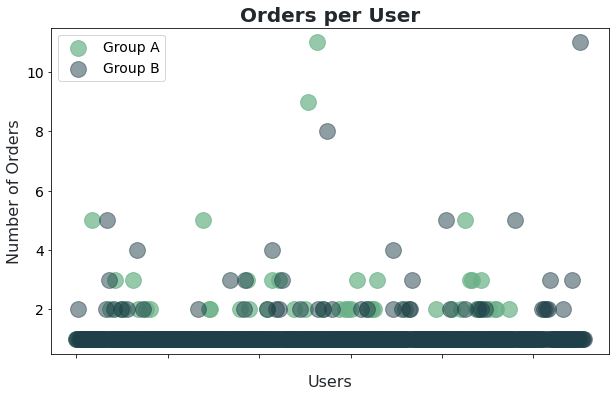

In [16]:
# calculating the number of orders per user
orders_per_user = orders.groupby('visitorId', as_index=False).agg({'group':['first', 'count']})
orders_per_user.columns = ['visitorId', 'group', 'n_orders']

# configuring up the scatterplot
plt.figure(figsize=(10,6))
plt.title('Orders per User', color=header, fontsize=20, fontweight='bold')
plt.ylabel('Number of Orders', color=header, fontsize=16)
plt.xlabel('Users', color=header, fontsize=16)
plt.xticks(alpha=0)
plt.yticks(fontsize=14)

# the scatterplot for Group A
x_values_A = pd.Series(range(0, len(orders_per_user.query('group == "A"')['n_orders'])))
plt.scatter(x_values_A, orders_per_user.query('group == "A"')['n_orders'], color=data1, alpha=0.7, s=250, label='Group A')

# the scatterplot for Group B
x_values_B = pd.Series(range(0, len(orders_per_user.query('group == "B"')['n_orders'])))
plt.scatter(x_values_B, orders_per_user.query('group == "B"')['n_orders'], color=data2, alpha=0.5, s=250, label='Group B')

plt.legend(loc='upper left', fontsize=14)
plt.show()

**Conclusion**

The majority of users only placed one order in August 2019. There were also many users that placed two orders and some that placed 3, but only a few users had more orders. There are two users for example who placed 12 individual orders in that month.

[back to A/B test](#3) - [back to content](#top)

<a id="3.6"></a>
### Anomalies in Number of Orders
Now let's find out what's a common number of orders per user and define and filter out anomalies.

In [17]:
# printing the number of buyers and values for different percentiles
print('\033[1m' + 'Percentiles for Orders per User' + '\033[0m')
print('Buyers:', len(orders_per_user))
print('95th percentile:', np.percentile(orders_per_user['n_orders'], [95]))
print('99th percentile:', np.percentile(orders_per_user['n_orders'], [99]))

Percentiles for Orders per User
Buyers: 1031
95th percentile: [2.]
99th percentile: [4.]


In [18]:
# defining users with more than 3 orders
too_many_orders = orders_per_user.query('n_orders > 3')['visitorId']

# filtering the orders table
orders_clean = orders[~orders['visitorId'].isin(too_many_orders)]

**Conclusion**

As we have suspected before from the scatterplot, **95%** of the buyers have placed 1 or 2 orders. Only **1%** have placed more than 4 orders. Since we only have 1,031 buyers we will *meet in the middle* and consider everything above **3** orders as an anomaly.

[back to A/B test](#3) - [back to content](#top)

<a id="3.7"></a>
### Order Prices

Now we will find how much revenue one order brings.

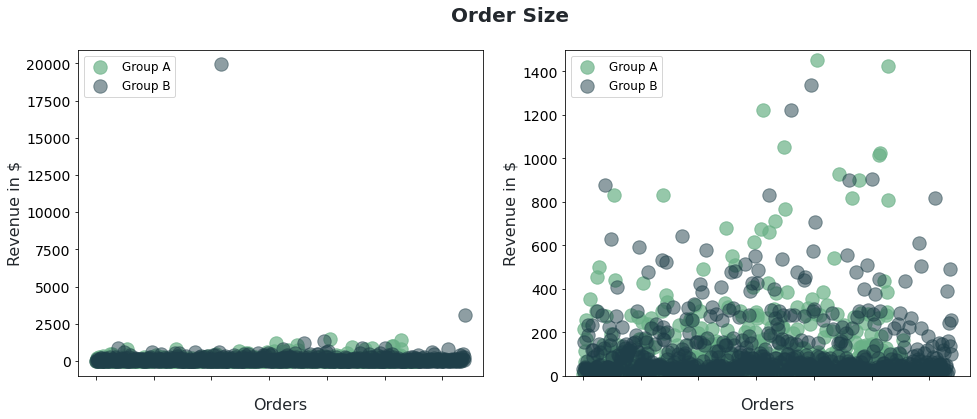

In [19]:
x_values_A = pd.Series(range(0, len(orders.query('group == "A"')['revenue'])))
x_values_B = pd.Series(range(0, len(orders.query('group == "B"')['revenue'])))

# setting up the figure
plt.figure(figsize=(16,6))
plt.suptitle('Order Size', color=header, fontsize=20, fontweight='bold')

# the scatterplot withouth limitations
plt.subplot(1,2,1)
plt.ylabel('Revenue in $', color=header, fontsize=16)
plt.xlabel('Orders', color=header, fontsize=16)
plt.xticks(alpha=0)
plt.yticks(fontsize=14)
plt.scatter(x_values_A, orders.query('group == "A"')['revenue'], color=data1, alpha=0.7, s=180, label='Group A')
plt.scatter(x_values_B, orders.query('group == "B"')['revenue'], color=data2, alpha=0.5, s=180, label='Group B')
plt.legend(loc='upper left', fontsize=12)

# the second scatterplot with limited y-axis
plt.subplot(1,2,2)
plt.ylabel('Revenue in $', color=header, fontsize=16)
plt.xlabel('Orders', color=header, fontsize=16)
plt.xticks(alpha=0)
plt.ylim(0,1500)
plt.yticks(fontsize=14)
plt.scatter(x_values_A, orders.query('group == "A"')['revenue'], color=data1, alpha=0.7, s=180, label="Group A")
plt.scatter(x_values_B, orders.query('group == "B"')['revenue'], color=data2, alpha=0.5, s=180, label="Group B")
plt.legend(loc='upper left', fontsize=12)

# showing the plots
plt.show()

**Conclusion**

In the first scatterplot we can see that we have one order that has a revenue of around **\$ 20,000**, which is way above the average. Because of this we can't really see what the size of most of the other orders is. We can only see that it is well below **\$ 1,500**. 

Because of this we are *zooming in* in the second scatterplot where we changed the limit of the y-axis to 1,500. We can now see that the majority of orders had a revenue of less than **\$ 200**, although there is a significant amount of orders with higher revenues.

[back to A/B test](#3) - [back to content](#top)

<a id="3.8"></a>
### Anomalies in Prices

Let's find orders that had uncommonly high prices and filter those from our clean data.

In [20]:
# printing the number of orders and revenue/price for different percentiles
print('\033[1m' + 'Percentiles for Order Size' + '\033[0m')
print('Orders:', len(orders))
print('95th percentile:', np.percentile(orders['revenue'], [95]))
print('99th percentile:', np.percentile(orders['revenue'], [99]))

Percentiles for Order Size
Orders: 1197
95th percentile: [435.54]
99th percentile: [900.904]


In [21]:
# filtering the orders_clean table for orders with a revenue of more than $450
orders_clean = orders_clean.query('revenue <= 450')

**Conclusion**

**95 %** of orders had a price of \$ 435.54 or less. The range for the 99th percentile is more than double: Only **1%** of orders had a price of more than \$ 900.90.

For our further analysis we will consider everything above **\$ 450.00** as an anomaly.

[back to A/B test](#3) - [back to content](#top)

<a id="3.9"></a>
### Statistical Significance in Conversion

We will find the statistical significance of the difference in conversion between the groups using the raw data and the filtered clean data and compare both results. We will set alpha or the *statistic significance level* as 0.05, meaning that the chance for a false result of the Mann-Whitney-Test is 5% or less.

**H<sub>0</sub>** = The conversion rates in Group A and Group B are the same <br>
**H<sub>1</sub>** = The conversion rates differ between Group A and Group B

In [22]:
# defining the dataframes that will be used and giving them names
dataframes = [orders, orders_clean]
orders.name = 'Orders (raw)'
orders_clean.name = 'Orders (filtered)'

# finding p-value and relative gain for both dataframes
for df in dataframes:
    
    # dividing by group and finding the number of orders
    ordersByUsersA = df.query('group == "A"')\
                       .groupby('visitorId', as_index=False)\
                       .agg({'transactionId':pd.Series.nunique})
    ordersByUsersA.columns = ['visitorId', 'orders']
    
    ordersByUsersB = df.query('group == "B"')\
                       .groupby('visitorId', as_index=False)\
                       .agg({'transactionId':pd.Series.nunique})
    ordersByUsersB.columns = ['visitorId', 'orders']

    # defining sample A for Group A
    sampleA = pd.concat([ordersByUsersA['orders']
                         ,pd.Series(0,index=np.arange(visits[visits['group']=='A']['visits'].sum()\
                                                       - len(ordersByUsersA['orders'])), name='orders')],axis=0)

    # defining sample B for Group B
    sampleB = pd.concat([ordersByUsersB['orders'],
                         pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum()\
                                                      - len(ordersByUsersB['orders'])), name='orders')],axis=0)
    
    alpha = 0.05
    p_value = stats.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]
    
    # printing p-value and relative gain
    print('\033[1m' + df.name + '\033[0m')
    print("p-value: {0:.5f}".format(p_value))
    print("relative gain: {0:.2%}".format(sampleB.mean()/sampleA.mean()-1))
    if p_value < 0.05:
        print('We reject the null hypothesis.')
        print('The conversion rates for Groups A and B are different.')
    else:
        print('We can not reject the null hypothesis')
        print('The conversion rates for Groups A and B are the same.')
    print()
    print()

Orders (raw)
p-value: 0.01679
relative gain: 13.81%
We reject the null hypothesis.
The conversion rates for Groups A and B are different.


Orders (filtered)
p-value: 0.01994
relative gain: 14.49%
We reject the null hypothesis.
The conversion rates for Groups A and B are different.




**Conclusion**

The p-value of **0.01679** is far less then 0.05, therefore we would reject the null hypothesis that the conversions for both groups are statistically equal. We can also see that the relative gain in conversion for Group B as opposed to Group A is **13.81%**. This means that we had more conversions from this group.

After filtering out anomalies in order size and orders per user the p-value increases slightly but is still only **0.01994** so we will reject the null hypothesis and assume that the conversion from both groups are different on a statistically relevant level. The relative gain in conversion in Group B as opposed to Group A is **14.49%** meaning that we saw a significant rise in conversion during our test.

[back to A/B test](#3) - [back to content](#top)

<a id="3.10"></a>
### Statistical Significance in Average Order Size

Now we will do the same for the average order size, again using our raw and filtered date to compare, again our *statistical significance level* will bei 0.05.


**H<sub>0</sub>** = The average order size in Group A and Group B is the same <br>
**H<sub>1</sub>** = The average order sizes differ between Group A and Group B

In [23]:
# finding p-value and relative gain for group and order size
for df in dataframes:
    
    alpha = 0.05
    p_value = stats.mannwhitneyu(df[df['group']=='A']['revenue'],
                                                       df[df['group']=='B']['revenue'], True, 'two-sided')[1]
    
    print('\033[1m' + df.name + '\033[0m')
    print("p-value: {0:.3f}".format(p_value))
    print("Relative Gain: {0:.2%}".format(df[df['group']=='B']['revenue'].mean()\
                                          /df[df['group']=='A']['revenue'].mean()-1))
    if p_value < 0.05:
        print('We reject the null hypothesis.')
        print('The order sizes for Groups A and B are different.')
    else:
        print('We can not reject the null hypothesis.')
        print('The order sizes for Groups A and B are the same.')
    print()

Orders (raw)
p-value: 0.692
Relative Gain: 25.17%
We can not reject the null hypothesis.
The order sizes for Groups A and B are the same.

Orders (filtered)
p-value: 0.761
Relative Gain: -3.60%
We can not reject the null hypothesis.
The order sizes for Groups A and B are the same.



**Conclusion**

In our original, raw data the p-pvalue for comparing the average order sizes is **0.692** which is significantly above the standard alpha value of 0.05. We would have to accept the null hypothesis that the means are equal, even though the relative gain in order size is **25.17%** in Group B as opposed to Group A. This could be explained by those extremely high outliers that we filtered out later. They will drive up the average price and therefore the gain, but they are not statistically significant.

After filtering out the anomalies in order size and number of orders the p-value is still noticeably higher than 0.05, namely **0.761** so we must still assume that the means are equal. The relative gain now is negative with **-3.60%** in Group B as opposed to Group A. So the average order size is a little bit smaller in Group B, but it's not statistically significant.

[back to A/B test](#3) - [back to content](#top)

<a id="3.11"></a>
### Recommendation based on the Test Results

First let's sum up what we found out in our analysis:

**Revenue / Order Size**
* In our raw data the cumulative revenue from Group B was higher than that of Group A.
* The revenue and order size were influenced by outliers with order prices of up to \$ 20,000
* The order size for most orders was less than \$ 450
* The average order size from Group B was higher than that of Group B, but after filtering out anomalies the relative gain was slightly negative, but not on a statistically significant level (p-value was 0.761, a strong indicator for an actual difference). Therefore we can assume that the average order size did not change.

**Conversion / Number of Orders**
* In our raw data the conversion rate for Group B ended up at 3.5% while for Group A it was slightly less than 3.0%
* Most of the users in both groups placed less than 4 orders during our test month
* For conversion the relative gain in Group B as opposed to Group A was 13.81% in our raw data. After filtering out anomalies it was even higher with 14.49% and a p-value of 0.01994, meaning that the difference was statistically significant. We can assume that there was an increase in conversion in Group B.

**Recommendation**

Based on the results of our A/B test I would recommend to stop the test. Even though the average order size didn't change we saw an increase in conversion and therefore total revenue for Group B. We should implement the changes on our website that we testet on Group B.

[back to A/B test](#3) - [back to content](#top)